In [197]:
import glob, re, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [198]:
results = []
for fname in glob.glob('*.summary'):
    #trainingset, affinity, gap, poses, receptor, astart, balanced
    fvals = re.sub('\.summary','', fname).split('_')
    del fvals[1]
    for line in open(fname):
        vals = line.split()
        #testset, iteration, rmse, R, S
        for i in xrange(2,5):
            vals[i] = float(vals[i])
        vals = vals[:5] #throw away auc for now

        results.append(fvals+vals)

In [199]:
results = pd.DataFrame(results,columns=('trainingset','gap','poses','rec','astrat','balanced','testset','iteration','rmse','R','S'))

In [200]:
results

,trainingset,gap,poses,rec,astrat,balanced,testset,iteration,rmse,R,S
0,crystal,g1,p0,rec0,astrat1,b0,crystal,100k,1.778665,0.553451,0.559034
1,crystal,g1,p0,rec0,astrat1,b0,crystal,best25,1.720422,0.563475,0.563795
2,crystal,g1,p0,rec0,astrat1,b0,bestonly,100k,1.932352,0.486315,0.514118
3,crystal,g1,p0,rec0,astrat1,b0,bestonly,best25,1.801383,0.543609,0.556814
4,crystal,g1,p0,rec0,astrat1,b0,all_affinity,100k,2.299054,0.323415,0.364082
5,crystal,g1,p0,rec0,astrat1,b0,all_affinity,best25,2.089105,0.433870,0.459166
6,besty,g1,p1,rec1,astrat0,b1,crystal,best100,1.848777,0.537792,0.530600
7,besty,g1,p1,rec1,astrat0,b1,crystal,best50,1.888171,0.522247,0.515179
8,besty,g1,p1,rec1,astrat0,b1,crystal,100k,1.803626,0.541185,0.535227
9,besty,g1,p1,rec1,astrat0,b1,crystal,best25,1.851972,0.527765,0.525086


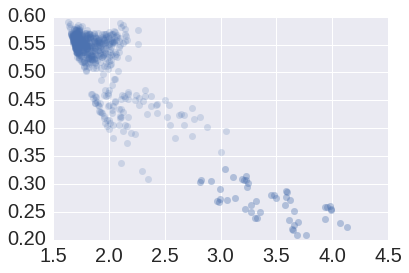

In [201]:
plt.plot(results.rmse,results.R,'o',alpha=.2)

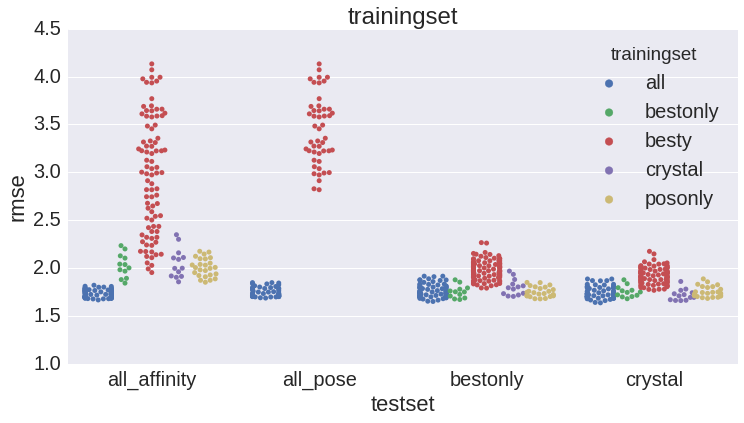

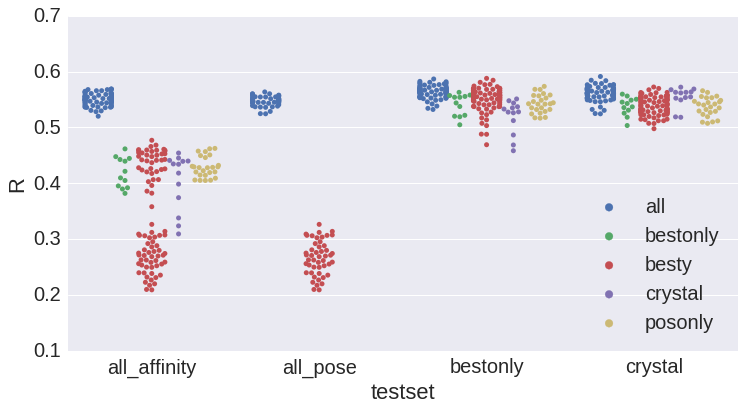

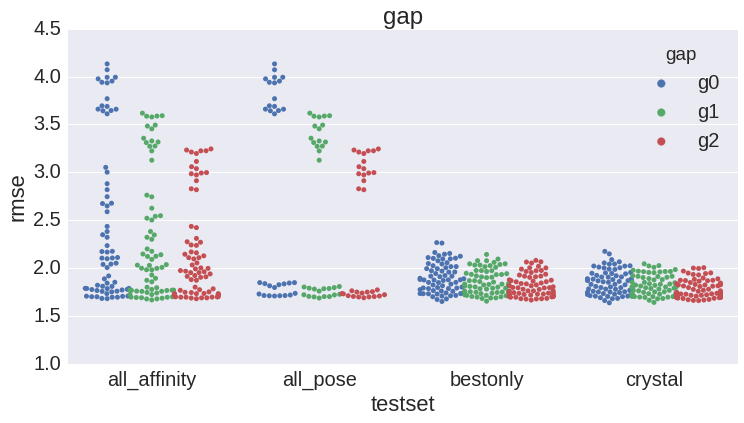

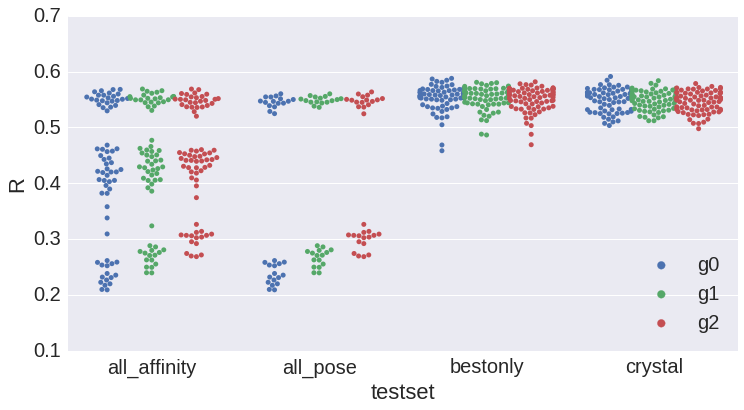

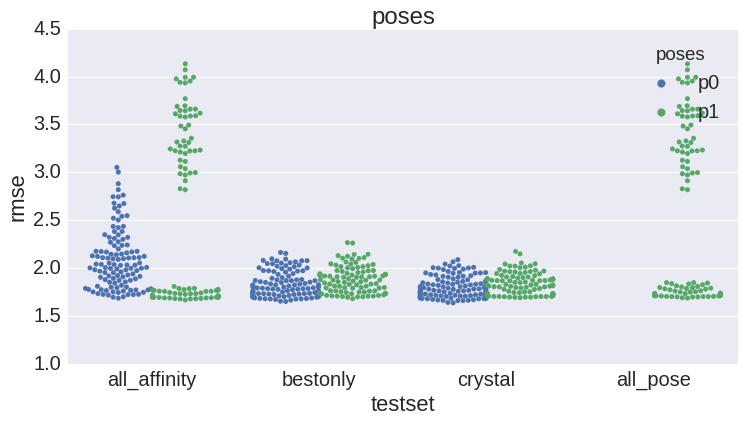

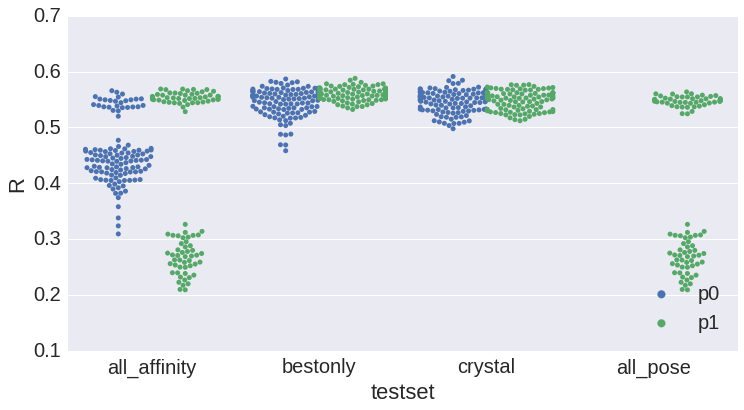

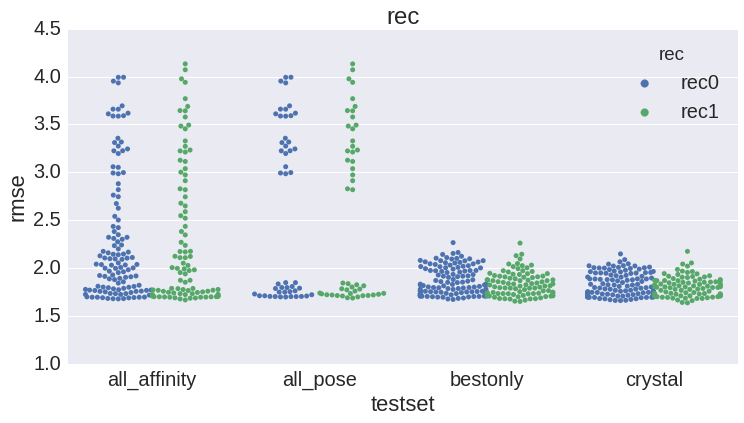

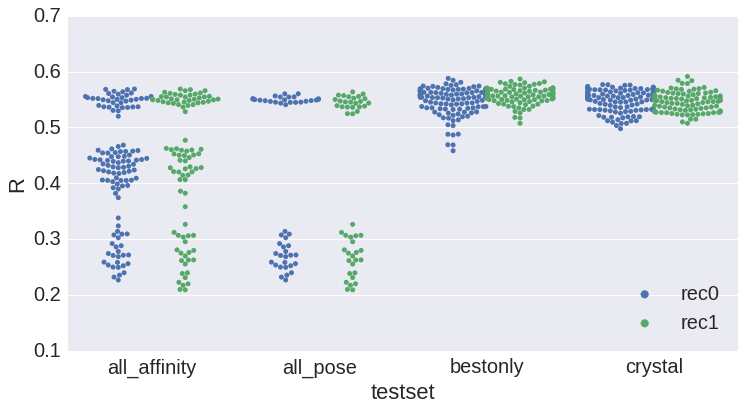

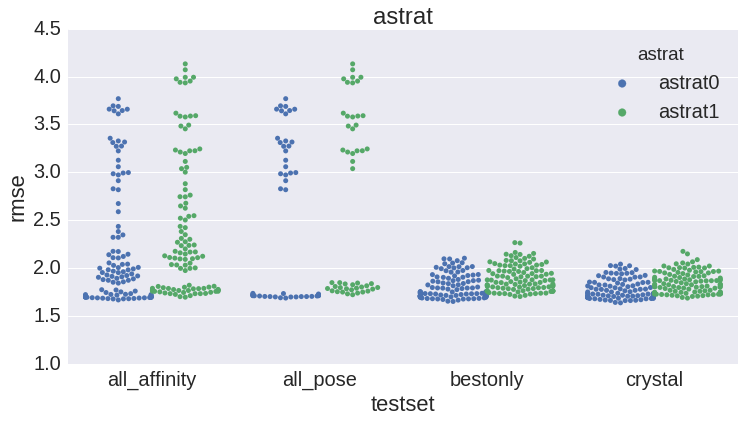

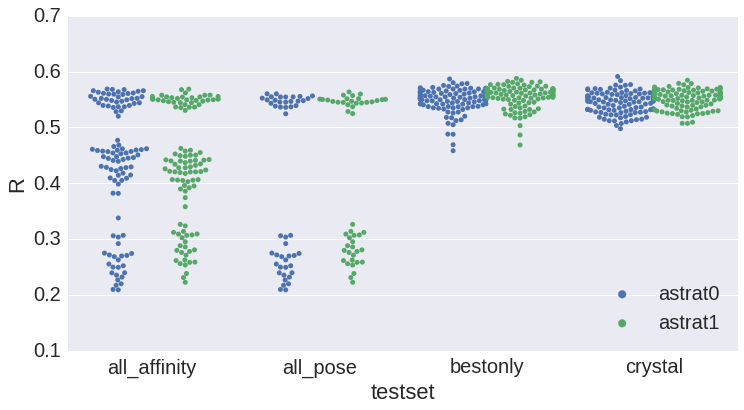

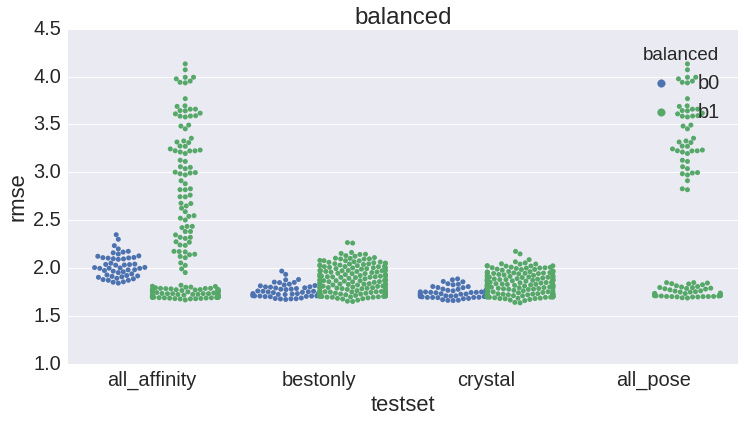

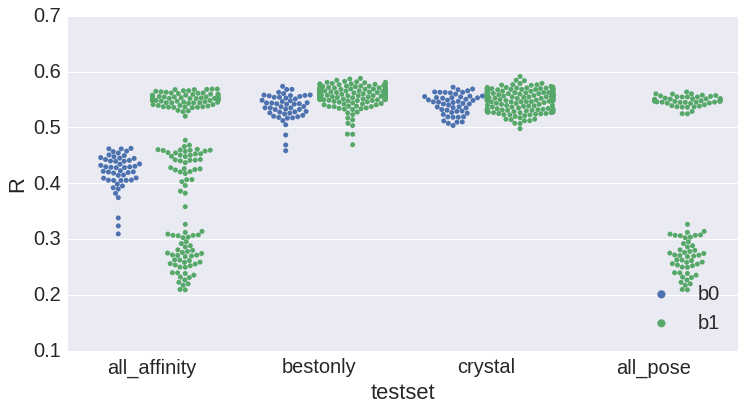

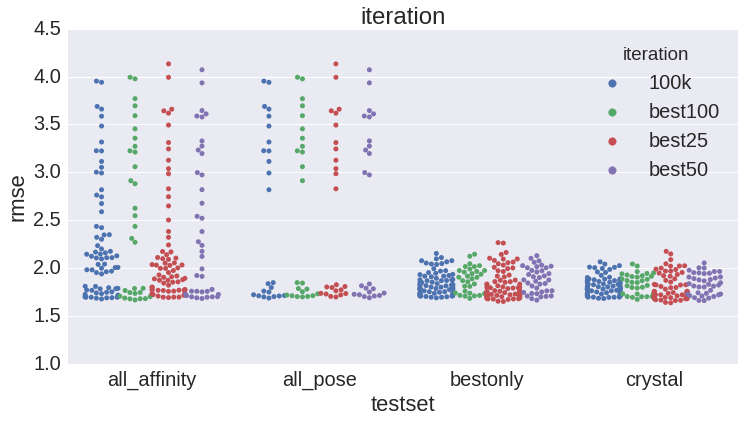

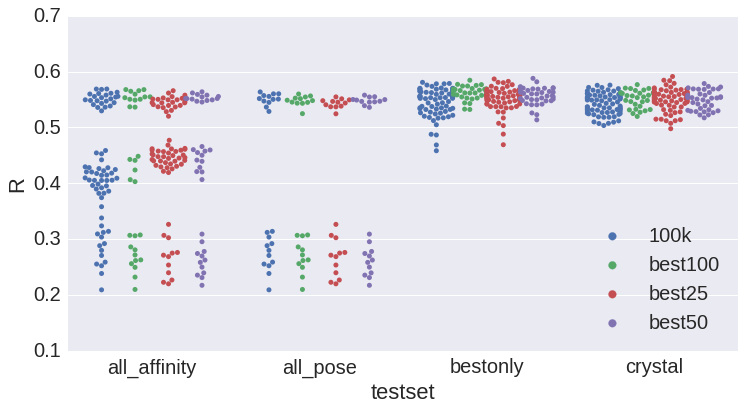

In [202]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
for X in ['trainingset','gap','poses','rec','astrat','balanced','iteration']:
    plt.figure(figsize=(12,6))
    sns.swarmplot(x='testset',y='rmse',hue=X,data=results.sort_values(by=[X,'testset']),split=True)
    plt.title(X)
    plt.figure(figsize=(12,6))
    sns.swarmplot(x='testset',y='R',hue=X,data=results.sort_values(by=[X,'testset']),split=True)
    plt.legend(loc='lower right')

In [66]:
results[(results.trainingset == 'all') & (results.testset == 'bestonly') & (results.iteration == '100k')].sort_values(by='rmse')

,trainingset,gap,poses,rec,astrat,balanced,testset,iteration,rmse,R,S
705,all,g1,p0,rec1,astrat0,b1,bestonly,100k,1.686541,0.578653,0.580294
677,all,g2,p0,rec1,astrat0,b1,bestonly,100k,1.693006,0.570003,0.568999
318,all,g2,p1,rec0,astrat0,b1,bestonly,100k,1.693133,0.568558,0.562468
460,all,g1,p1,rec1,astrat0,b1,bestonly,100k,1.697686,0.565068,0.560668
220,all,g1,p1,rec0,astrat0,b1,bestonly,100k,1.701162,0.578027,0.578424
236,all,g2,p1,rec1,astrat0,b1,bestonly,100k,1.705024,0.551951,0.548958
26,all,g0,p0,rec1,astrat0,b1,bestonly,100k,1.708489,0.568844,0.576292
90,all,g2,p0,rec0,astrat0,b1,bestonly,100k,1.708571,0.564509,0.566636
180,all,g0,p1,rec0,astrat0,b1,bestonly,100k,1.727067,0.573422,0.577465
264,all,g0,p1,rec1,astrat0,b1,bestonly,100k,1.729271,0.555851,0.553057


In [67]:
results[(results.trainingset == 'all') & (results.testset == 'bestonly') & (results.iteration == '100k')].sort_values('R',ascending=False)

,trainingset,gap,poses,rec,astrat,balanced,testset,iteration,rmse,R,S
705,all,g1,p0,rec1,astrat0,b1,bestonly,100k,1.686541,0.578653,0.580294
725,all,g2,p1,rec1,astrat1,b1,bestonly,100k,1.731452,0.578038,0.577281
220,all,g1,p1,rec0,astrat0,b1,bestonly,100k,1.701162,0.578027,0.578424
668,all,g2,p0,rec1,astrat1,b1,bestonly,100k,1.736451,0.575804,0.577452
180,all,g0,p1,rec0,astrat0,b1,bestonly,100k,1.727067,0.573422,0.577465
483,all,g1,p0,rec1,astrat1,b1,bestonly,100k,1.782380,0.570537,0.570389
677,all,g2,p0,rec1,astrat0,b1,bestonly,100k,1.693006,0.570003,0.568999
26,all,g0,p0,rec1,astrat0,b1,bestonly,100k,1.708489,0.568844,0.576292
318,all,g2,p1,rec0,astrat0,b1,bestonly,100k,1.693133,0.568558,0.562468
350,all,g0,p0,rec1,astrat1,b1,bestonly,100k,1.821193,0.568530,0.567863


In [172]:
def findpairs(results, col, val1, val2, metric):
    '''for a given column and values, find all the examples that differ only by those values and 
    return a list of tuples of the given metric for each value example'''
    ret1 = []
    ret2 = []
    names = []
    first = results[results[col] == val1]
    second = results[results[col] == val2]
    cols = list(results.columns[:8])
    cols.remove(col)
    cols.remove('balanced') # disjoint
    combo = first.merge(second,on=cols)
    
    x = '%s_x' % metric
    y = '%s_y' % metric
    for (_,r) in combo.iterrows():
        ret1.append(r[x])
        ret2.append(r[y])
        names.append(r.values)
    
    return (np.array(ret1),np.array(ret2), names)
        

In [173]:
gap01 = findpairs(results, 'gap', 'g0','g1', 'rmse')

In [192]:
def plot_diff(results,col,val1,val2):
    '''do scatterplot between val1 and val2'''
    res = findpairs(results, col, val1, val2, 'rmse')
    plt.figure(figsize=(15,4))
    p = plt.subplot(1,3,1)
    p.plot([1,5],[1,5],'k',linewidth=1)
    p.plot(res[0],res[1],'o',alpha=.4)
    p.set_aspect('equal')
    p.set_xlabel(val1)
    p.set_ylabel(val2)
    p.set_title(col)

    p = plt.subplot(1,3,2)
    p.plot([1,5],[1,5],'k',linewidth=1)
    p.plot(res[0],res[1],'o',alpha=.4)
    p.set_aspect('equal')
    p.set_ylim(1.5,2.5)
    p.set_xlim(1.5,2.5)
    p.set_xlabel(val1)
    #p.set_ylabel(val2)
    p.set_title(col)
    
    res = findpairs(results, col, val1, val2, 'R')
    p = plt.subplot(1,3,3)
    p.plot([0,1],[0,1],'k',linewidth=1)
    p.plot(res[0],res[1],'o',alpha=.4)
    p.set_aspect('equal')
    p.set_xlabel(val1)
    #p.set_ylabel(val2)
    p.set_title(col+" R")
    
    

The y-axis is better if the points are *below* the line for RMSE and *above* the line for R.

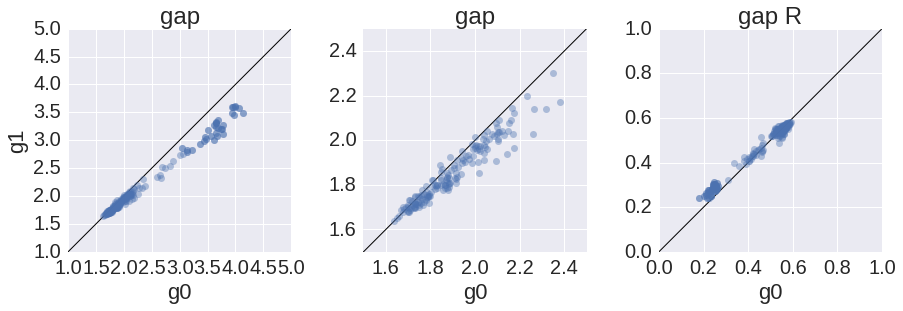

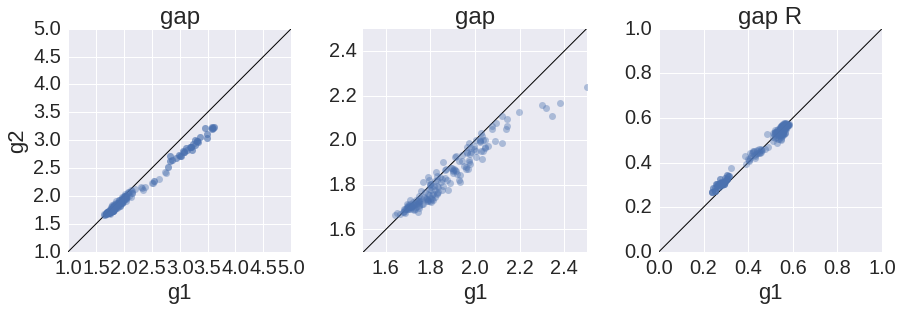

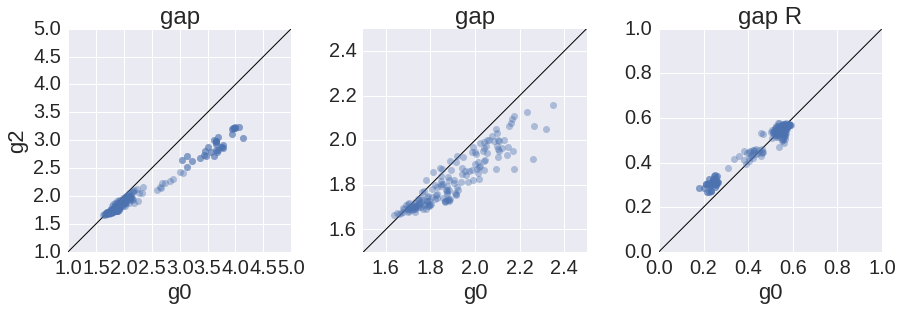

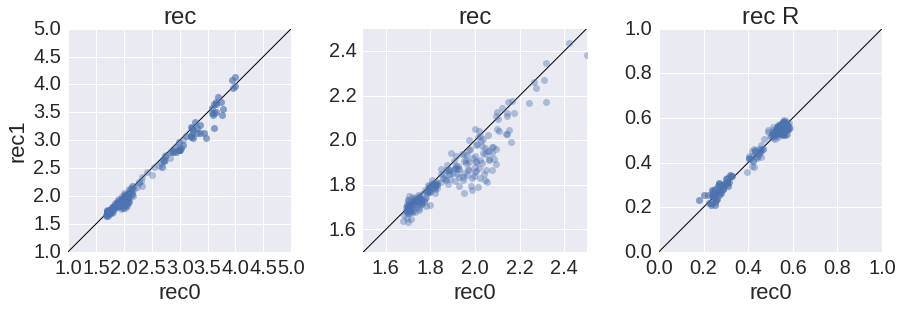

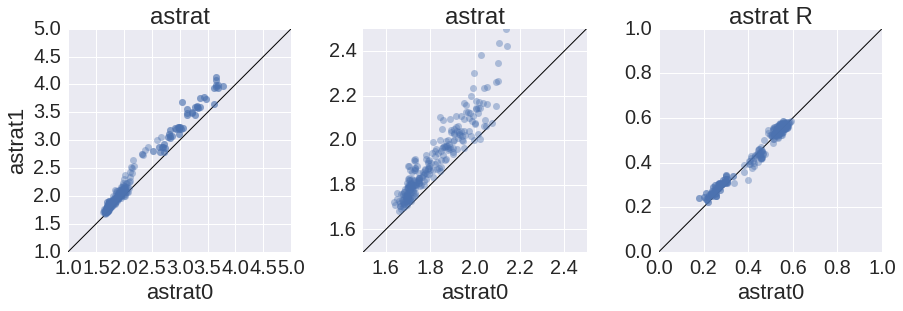

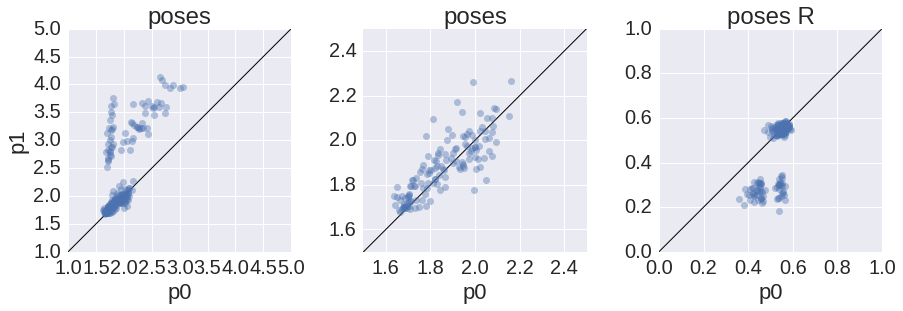

In [193]:
plot_diff(results,'gap','g0','g1')
plot_diff(results,'gap','g1','g2')
plot_diff(results,'gap','g0','g2')
plot_diff(results,'rec','rec0','rec1')
plot_diff(results,'astrat','astrat0','astrat1')
plot_diff(results,'poses','p0','p1')

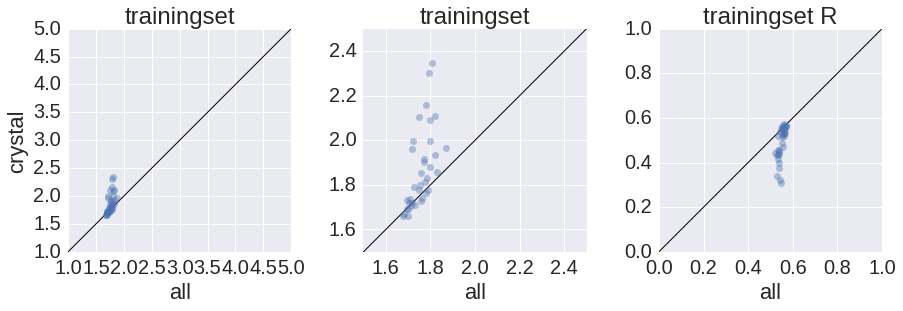

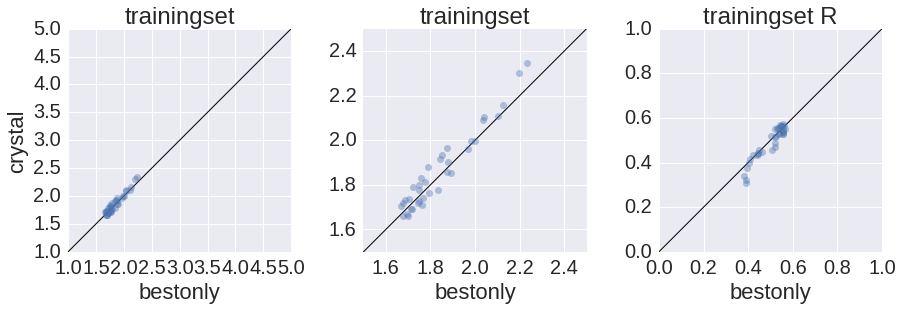

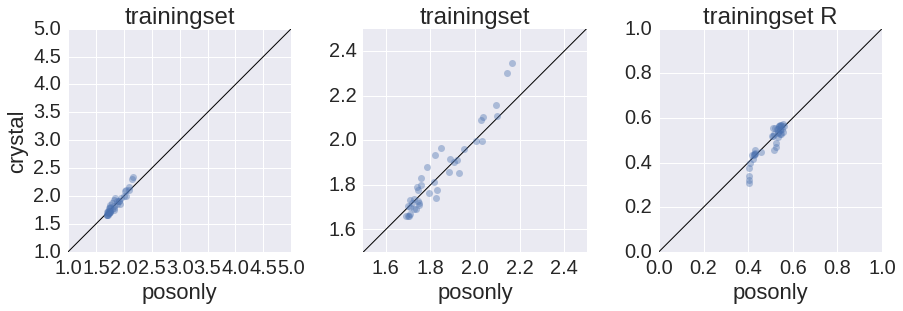

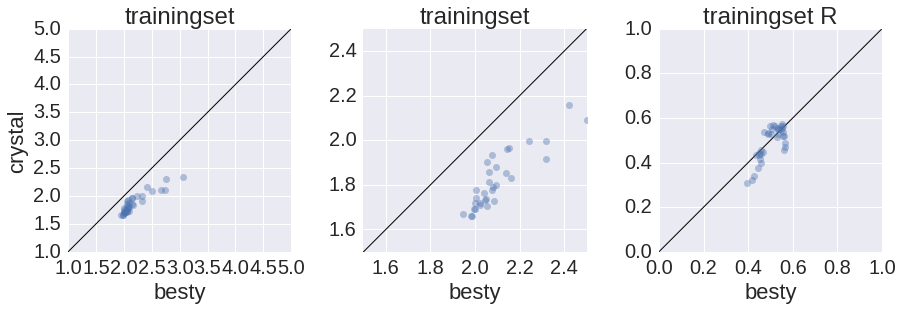

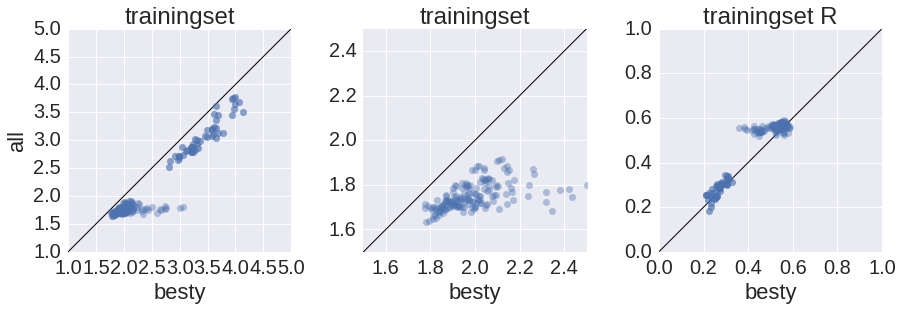

In [194]:
plot_diff(results,'trainingset','all','crystal')
plot_diff(results,'trainingset','bestonly','crystal')
plot_diff(results,'trainingset','posonly','crystal')
plot_diff(results,'trainingset','besty','crystal')
plot_diff(results,'trainingset','besty','all')

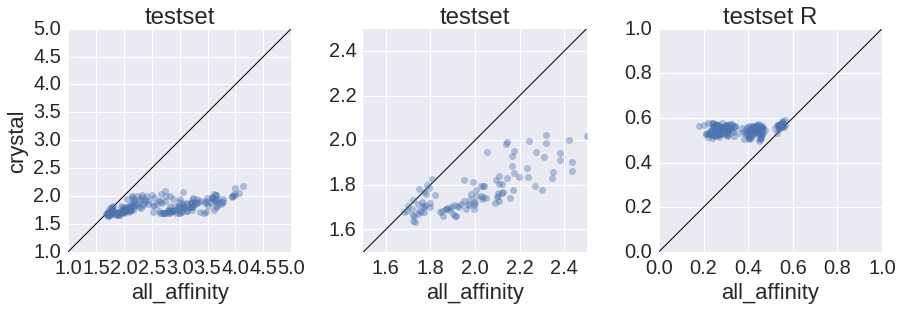

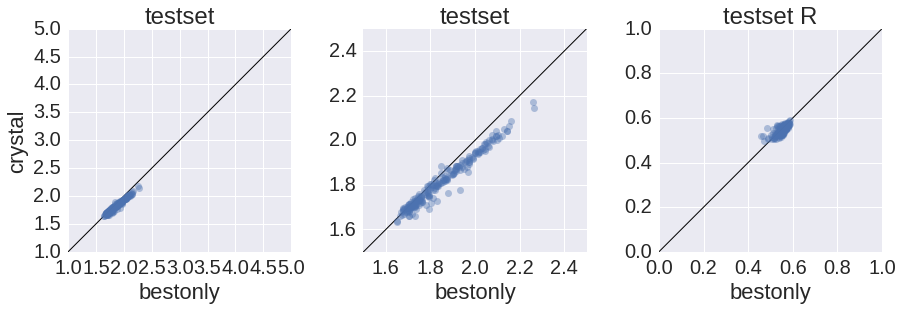

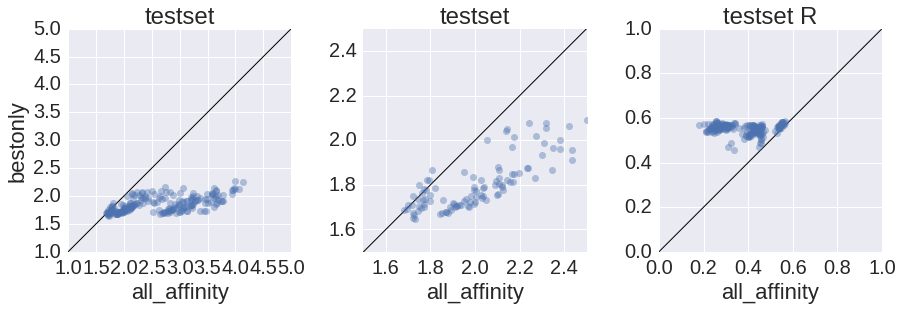

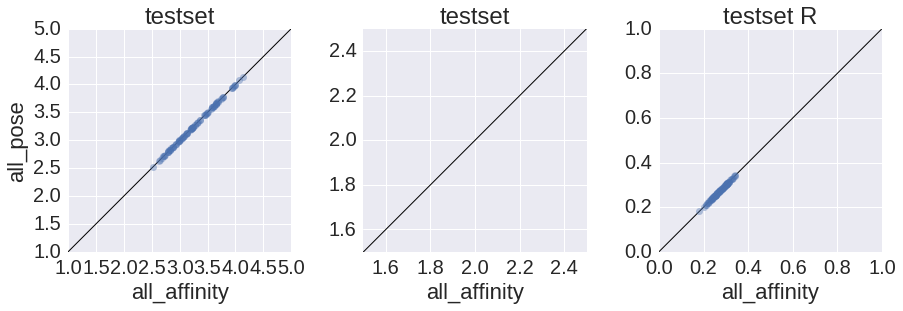

In [195]:
plot_diff(results,'testset','all_affinity','crystal')
plot_diff(results,'testset','bestonly','crystal')
plot_diff(results,'testset','all_affinity','bestonly')
plot_diff(results,'testset','all_affinity','all_pose')

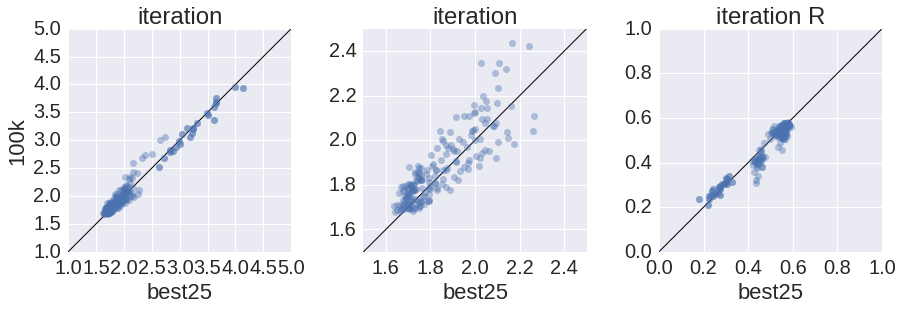

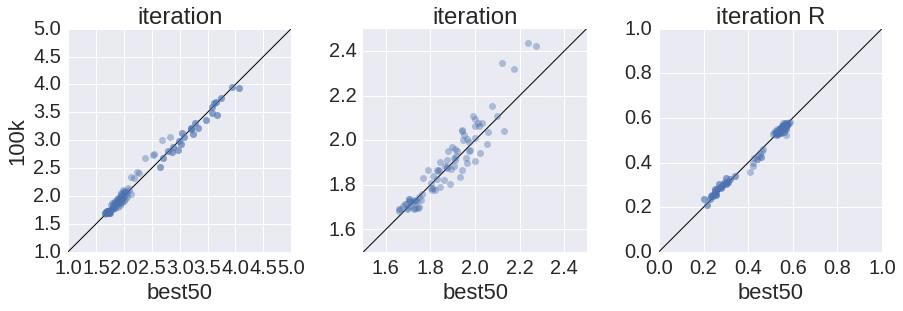

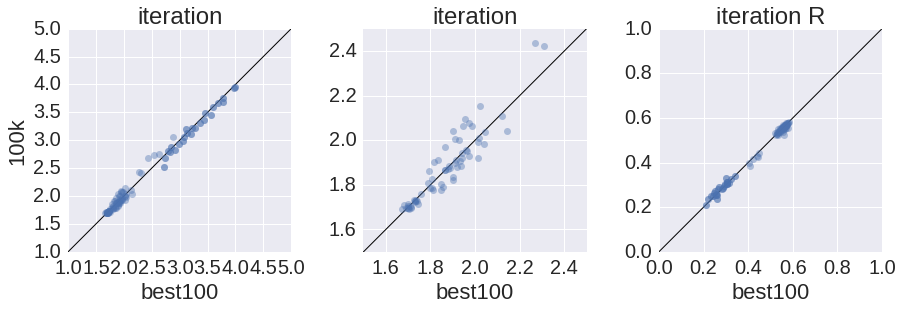

In [196]:
plot_diff(results,'iteration','best25','100k')
plot_diff(results,'iteration','best50','100k')
plot_diff(results,'iteration','best100','100k')